IMPORTO IL DATASET

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
df = pd.read_csv(r"C:\Users\utente\Downloads\pokemon-sporco.csv")
print (df)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [51]:
righedatimancanti=df[df.isnull().any(axis=1)]#any(axis=1) è True se almeno un valore nella riga è mancante (None o NaN)
totaledatimancanti=righedatimancanti.shape[0]#fornisce il numero di righe nel DataFrame
print("Le righe con i dati mancanti sono: ")
print(righedatimancanti)
print(f"Il totale dei dati mancanti è: {totaledatimancanti}")

Le righe con i dati mancanti sono: 
       #        Name  Type 1 Type 2  Total   HP  Attack  Defense  Sp. Atk  \
4      4  Charmander    Fire    NaN    309   39      52       43       60   
5      5  Charmeleon    Fire    NaN    405   58      64       58       80   
9      7    Squirtle   Water    NaN    314   44      48       65       50   
10     8   Wartortle   Water    NaN    405   59      63       80       65   
11     9   Blastoise   Water    NaN    530   79      83      100       85   
..   ...         ...     ...    ...    ...  ...     ...      ...      ...   
775  705     Sliggoo  Dragon    NaN    452   68      75       53       83   
776  706      Goodra  Dragon    NaN    600   90     100       70      110   
788  712    Bergmite     Ice    NaN    304   55      69       85       32   
789  713     Avalugg     Ice    NaN    514   95     117      184       44   
792  716     Xerneas   Fairy    NaN    680  126     131       95      131   

     Sp. Def  Speed  Generation  Legend

In [52]:
totaledatimancanti=righedatimancanti.shape[0]#shape 0 è il numero di righe, 1 mi da il numero di colonne
colonnedatimancanti=df.isnull().any(axis=0)#any(axis=0)' è True se almeno un valore nella colonna è mancante (None o NaN)
print("Colonne con dati mancanti:")
print(colonnedatimancanti)
print(f"Totale dei dati mancanti: {totaledatimancanti}")

Colonne con dati mancanti:
#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool
Totale dei dati mancanti: 386


In [53]:
datimancanti=df.isnull()
print("I valori mancanti per ciascuna colonna sono:")
print(datimancanti)
#Gestione dei valori mancanti
datimancanti=df.isnull().sum()#sum fa il conteggio
print("I valori mancanti per ciascuna colonna sono:")
print(datimancanti)

I valori mancanti per ciascuna colonna sono:
         #   Name  Type 1  Type 2  Total     HP  Attack  Defense  Sp. Atk  \
0    False  False   False   False  False  False   False    False    False   
1    False  False   False   False  False  False   False    False    False   
2    False  False   False   False  False  False   False    False    False   
3    False  False   False   False  False  False   False    False    False   
4    False  False   False    True  False  False   False    False    False   
..     ...    ...     ...     ...    ...    ...     ...      ...      ...   
795  False  False   False   False  False  False   False    False    False   
796  False  False   False   False  False  False   False    False    False   
797  False  False   False   False  False  False   False    False    False   
798  False  False   False   False  False  False   False    False    False   
799  False  False   False   False  False  False   False    False    False   

     Sp. Def  Speed  Generatio

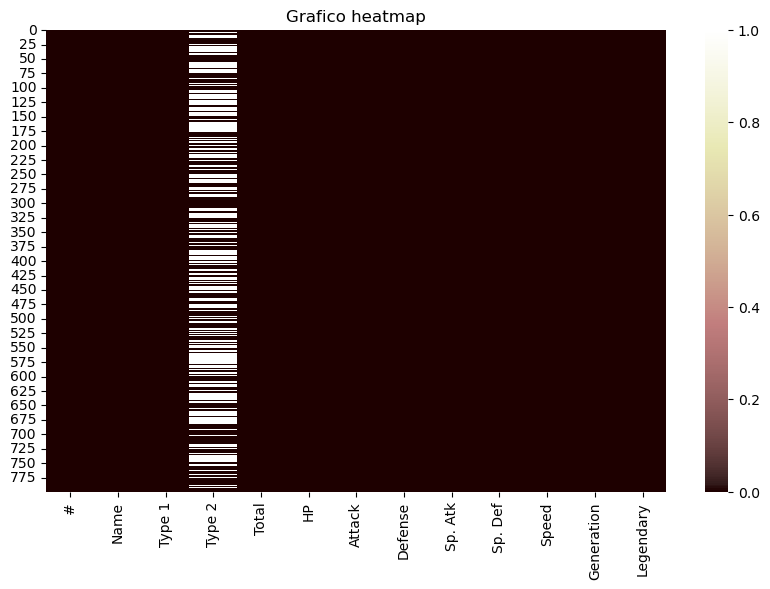

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap="pink")
plt.title("Grafico heatmap")
plt.show()

In [55]:
df1=pd.DataFrame()
#Seleziona le colonne numeriche e riempi i valori NaN con la media
colonnenumeriche=df.select_dtypes(include=['number'])#con include ci si include tutto quello che è numero
df1[colonnenumeriche.columns]=colonnenumeriche.fillna(colonnenumeriche.mean())
#Seleziona le colonne categoriche e riempi i valori NaN con None perchè un pokemon può non avere un secondo tipo 
colonnecategoriche=df.select_dtypes(include=['object'])
df1[colonnecategoriche.columns]=colonnecategoriche.fillna('None')
print(f"Questo è il primo con i valori mancanti: \n{df}\nQuesto invece è il secondo con i missing values sostituiti:\n{df1}\n")

Questo è il primo con i valori mancanti: 
       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120  

In [56]:
df1

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Name,Type 1,Type 2
0,1,318,45,49,49,65,65,45,1,Bulbasaur,Grass,Poison
1,2,405,60,62,63,80,80,60,1,Ivysaur,Grass,Poison
2,3,525,80,82,83,100,100,80,1,Venusaur,Grass,Poison
3,3,625,80,100,123,122,120,80,1,VenusaurMega Venusaur,Grass,Poison
4,4,309,39,52,43,60,50,65,1,Charmander,Fire,None
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,Diancie,Rock,Fairy
796,719,700,50,160,110,160,110,110,6,DiancieMega Diancie,Rock,Fairy
797,720,600,80,110,60,150,130,70,6,HoopaHoopa Confined,Psychic,Ghost
798,720,680,80,160,60,170,130,80,6,HoopaHoopa Unbound,Psychic,Dark


TROVO GLI OUTLIERS

In [57]:


mean_value1 = df1['Total'].mean()
std_dev = df1['Total'].std()
outliers1 = df1[(df1['Total'] > mean_value + 3 * std_dev) | (df1['Total'] < mean_value - 3 * std_dev)]

mean_value2 = df1['Attack'].mean()
std_dev = df1['Attack'].std()
outliers2 = df1[(df1['Attack'] > mean_value + 3 * std_dev) | (df1['Attack'] < mean_value - 3 * std_dev)]

mean_value3 = df1['Defense'].mean()
std_dev = df1['Defense'].std()
outliers3 = df1[(df1['Defense'] > mean_value + 3 * std_dev) | (df1['Defense'] < mean_value - 3 * std_dev)]

mean_value4 = df1['Sp. Atk'].mean()
std_dev = df1['Sp. Atk'].std()
outliers4 = df1[(df1['Sp. Atk'] > mean_value + 3 * std_dev) | (df1['Sp. Atk'] < mean_value - 3 * std_dev)]

mean_value5 = df1['Sp. Def'].mean()
std_dev = df1['Sp. Def'].std()
outliers5 = df1[(df1['Sp. Def'] > mean_value + 3 * std_dev) | (df1['Sp. Def'] < mean_value - 3 * std_dev)]

mean_value6 = df1['Speed'].mean()
std_dev = df1['Speed'].std()
outliers6 = df1[(df1['Speed'] > mean_value + 3 * std_dev) | (df1['Speed'] < mean_value - 3 * std_dev)]

outliers

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Name,Type 1,Type 2
315,291,456,61,90,45,50,50,160,3,Ninjask,Bug,Flying
431,386,600,50,95,90,95,90,180,3,DeoxysSpeed Forme,Psychic,None


In [ ]:
import matplotlib.pyplot as plt

# Crea un grafico a dispersione per il primo set di dati
plt.scatter(df.index, mean_value1)

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers1, color='red')

# Crea un grafico a dispersione per il secondo set di dati
plt.scatter(df.index, mean_value2)

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers2, color='red')

# Crea un grafico a dispersione per il terzo set di dati
plt.scatter(df.index, mean_value3)

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers3, color='red')

# Crea un grafico a dispersione per il quarto set di dati
plt.scatter(df.index, mean_value4)

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers4, color='red')

# Crea un grafico a dispersione per il quinto set di dati
plt.scatter(df.index, mean_value5)

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers5, color='red')

# Crea un grafico a dispersione per il sesto set di dati
plt.scatter(df.index, mean_value6)

# Evidenzia gli outliers nel grafico con un colore diverso
plt.scatter(outliers.index, outliers6, color='red')

# Aggiungi la media e la deviazione standard al grafico
plt.axhline(y=mean_value1, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value1 + 3 * std_dev, color='orange', linestyle='--', label='±3 Deviazioni Standard')
plt.axhline(y=mean_value1 - 3 * std_dev, color='orange', linestyle='--')

# Aggiungi etichette e legenda al grafico
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostra il grafico
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
Total=df1['Total']
HP=df1['HP']
Attack=df1['Attack']
Defense=df1['Defense']
SpecialAtk=df1['Sp. Atk']
SpecialDef=df1['Sp. Def']
Speed=df1['Speed']
Generation=df1['Generation']
Name=df1['Name']
Type_1=df1['Type 1']
Type_2=df1['Type 2']
# Splitting the data
a_train, a_test, s_train, s_test, d_train, d_test, f_train, f_test, g_train, g_test, h_train, h_test, j_train, j_test, k_train, k_test, l_train, l_test, z_train, z_test, x_train, x_test, = train_test_split(Total, HP, Attack, Defense, SpecialAtk, SpecialDef, Speed, Generation, Name, Type_1, Type_2, test_size=0.3, random_state=42)
# Print the dimensions of the training set and test set
print("Dimensioni del Training Set :", a_train.shape, s_train.shape, d_train.shape, f_train.shape, g_train.shape, h_train.shape, j_train.shape, k_train.shape, l_train.shape, z_train.shape, x_train.shape)
print("Dimensioni del Test Set :", a_test.shape, s_test.shape, d_test.shape, f_test.shape, g_test.shape, h_test.shape, j_test.shape, k_test.shape, l_test.shape, z_test.shape, x_test.shape)

Dimensioni del Training Set : (560,) (560,) (560,) (560,) (560,) (560,) (560,) (560,) (560,) (560,) (560,)
Dimensioni del Test Set : (240,) (240,) (240,) (240,) (240,) (240,) (240,) (240,) (240,) (240,) (240,)


In [65]:
from sklearn.model_selection import train_test_split
import numpy as np
X=a_train
Y=s_train
X_test=a_test
Y_test=s_test

proporzione_classe_A = sum(y == 'A') / len(y)
proporzione_classe_B = 1 - proporzione_classe_A
proporzione_classe_C = 1 - proporzione_classe_B
proporzione_classe_D = 1 - proporzione_classe_C
proporzione_classe_E = 1 - proporzione_classe_D
proporzione_classe_F = 1 - proporzione_classe_E
proporzione_classe_G = 1 - proporzione_classe_F
proporzione_classe_H = 1 - proporzione_classe_G
proporzione_classe_I = 1 - proporzione_classe_H
proporzione_classe_J = 1 - proporzione_classe_I
proporzione_classe_K = 1 - proporzione_classe_J
# Eseguire uno split stratificato con una proporzione specificata
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Calcola le proporzioni delle classi nel training set e nel test set
proporzione_classe_A_train = sum(Y_train == 'A') / len(Y_train)
proporzione_classe_B_train = 1 - proporzione_classe_A_train
proporzione_classe_C_train = 1 - proporzione_classe_B_train
proporzione_classe_D_train = 1 - proporzione_classe_C_train
proporzione_classe_E_train = 1 - proporzione_classe_D_train
proporzione_classe_F_train = 1 - proporzione_classe_E_train
proporzione_classe_G_train = 1 - proporzione_classe_F_train
proporzione_classe_H_train = 1 - proporzione_classe_G_train
proporzione_classe_I_train = 1 - proporzione_classe_H_train
proporzione_classe_J_train = 1 - proporzione_classe_I_train
proporzione_classe_K_train = 1 - proporzione_classe_J_train

proporzione_classe_A_test = sum(Y_test == 'A') / len(Y_test)
proporzione_classe_B_test = 1 - proporzione_classe_A_test
proporzione_classe_C_test = 1 - proporzione_classe_B_test
proporzione_classe_D_test = 1 - proporzione_classe_C_test
proporzione_classe_E_test = 1 - proporzione_classe_D_test
proporzione_classe_F_test = 1 - proporzione_classe_E_test
proporzione_classe_G_test = 1 - proporzione_classe_F_test
proporzione_classe_H_test = 1 - proporzione_classe_G_test
proporzione_classe_I_test = 1 - proporzione_classe_H_test
proporzione_classe_J_test = 1 - proporzione_classe_I_test
proporzione_classe_K_test = 1 - proporzione_classe_J_test

# Stampa delle proporzioni
print("Proporzione Classe A nel data Set completo:", proporzione_classe_A)
print("Proporzione Classe B nel data Setcompleto:", proporzione_classe_B)
print("Proporzione Classe C nel data Setcompleto:", proporzione_classe_C)
print("Proporzione Classe D nel data Setcompleto:", proporzione_classe_D)
print("Proporzione Classe E nel data Setcompleto:", proporzione_classe_E)
print("Proporzione Classe F nel data Setcompleto:", proporzione_classe_F)
print("Proporzione Classe G nel data Setcompleto:", proporzione_classe_G)
print("Proporzione Classe H nel data Setcompleto:", proporzione_classe_H)
print("Proporzione Classe I nel data Setcompleto:", proporzione_classe_I)
print("Proporzione Classe J nel data Setcompleto:", proporzione_classe_J)
print("Proporzione Classe K nel data Setcompleto:", proporzione_classe_K)
print("Proporzione Classe A nel Training Set:", proporzione_classe_A_train)
print("Proporzione Classe B nel Training Set:", proporzione_classe_B_train)
print("Proporzione Classe C nel Training Set:", proporzione_classe_C_train)
print("Proporzione Classe D nel Training Set:", proporzione_classe_E_train)
print("Proporzione Classe F nel Training Set:", proporzione_classe_F_train)
print("Proporzione Classe G nel Training Set:", proporzione_classe_G_train)
print("Proporzione Classe H nel Training Set:", proporzione_classe_H_train)
print("Proporzione Classe I nel Training Set:", proporzione_classe_I_train)
print("Proporzione Classe J nel Training Set:", proporzione_classe_J_train)
print("Proporzione Classe K nel Training Set:", proporzione_classe_K_train)
print("Proporzione Classe A nel Test Set:", proporzione_classe_A_test)
print("Proporzione Classe B nel Test Set:", proporzione_classe_B_test)
print("Proporzione Classe C nel Test Set:", proporzione_classe_C_test)
print("Proporzione Classe D nel test Set:", proporzione_classe_D_test)
print("Proporzione Classe E nel Test Set:", proporzione_classe_E_test)
print("Proporzione Classe F nel Test Set:", proporzione_classe_F_test)
print("Proporzione Classe G nel Test Set:", proporzione_classe_G_test)
print("Proporzione Classe H nel Test Set:", proporzione_classe_H_test)
print("Proporzione Classe I nel Test Set:", proporzione_classe_I_test)
print("Proporzione Classe J nel Test Set:", proporzione_classe_J_test)
print("Proporzione Classe K nel Test Set:", proporzione_classe_K_test)

Proporzione Classe A nel data Set completo: 0.0
Proporzione Classe B nel data Setcompleto: 1.0
Proporzione Classe C nel data Setcompleto: 0.0
Proporzione Classe D nel data Setcompleto: 1.0
Proporzione Classe E nel data Setcompleto: 0.0
Proporzione Classe F nel data Setcompleto: 1.0
Proporzione Classe G nel data Setcompleto: 0.0
Proporzione Classe H nel data Setcompleto: 1.0
Proporzione Classe I nel data Setcompleto: 0.0
Proporzione Classe J nel data Setcompleto: 1.0
Proporzione Classe K nel data Setcompleto: 0.0
Proporzione Classe A nel Training Set: 0.0
Proporzione Classe B nel Training Set: 1.0
Proporzione Classe C nel Training Set: 0.0
Proporzione Classe D nel Training Set: 0.0
Proporzione Classe F nel Training Set: 1.0
Proporzione Classe G nel Training Set: 0.0
Proporzione Classe H nel Training Set: 1.0
Proporzione Classe I nel Training Set: 0.0
Proporzione Classe J nel Training Set: 1.0
Proporzione Classe K nel Training Set: 0.0
Proporzione Classe A nel Test Set: 0.0
Proporzione C